In [129]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')

df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

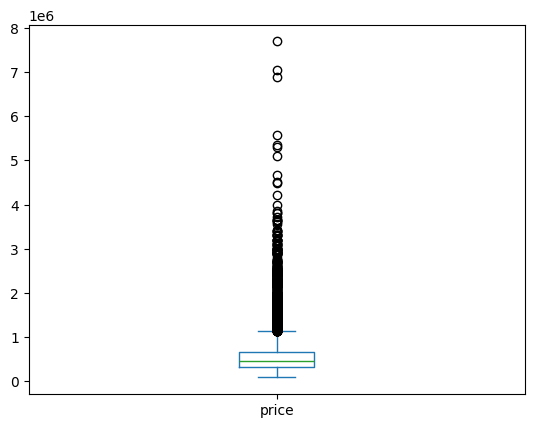

In [131]:
df.price.plot.box()

In [132]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [133]:
df[df['price'] > 1000000].count()

id               1465
date             1465
price            1465
bedrooms         1465
bathrooms        1465
sqft_living      1465
sqft_lot         1465
floors           1465
waterfront       1465
view             1465
condition        1465
grade            1465
sqft_above       1465
sqft_basement    1465
yr_built         1465
yr_renovated     1465
zipcode          1465
lat              1465
long             1465
sqft_living15    1465
sqft_lot15       1465
dtype: int64

In [134]:
df.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [135]:
df.drop(columns=['date'], inplace=True)

In [136]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [137]:
x = df[['lat', 'long']]
y = df['price']

In [138]:
# split data train test dengan rasio 70:30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [139]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 2)
(6484, 2)
(15129,)
(6484,)


In [140]:
# modeling dengan menggunakan linear regresion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [141]:
# evaluasi model

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('MSE :', mse)
print('RMSE : ', rmse)
print('r2 : ', r2)


MSE : 131045090469.83116
RMSE :  362001.5061706666
r2 :  0.09227513454093372


c:\Users\natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [142]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')


# split data train test
from sklearn.model_selection import train_test_split

x = df.drop(columns=['price'])
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [143]:
# concate x_train with y_train

df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
167,1836980160,20150324T000000,4,2.50,2680,4499,2.0,0,0,3,...,2680,0,1999,0,98006,47.5650,-122.125,2920,4500,807100.0
12412,9221400335,20141001T000000,4,1.75,2340,5080,1.0,0,0,5,...,1170,1170,1924,0,98115,47.6746,-122.320,1270,3270,570000.0
7691,6669020490,20140812T000000,4,2.25,2190,9020,2.0,0,0,3,...,2190,0,1978,0,98032,47.3742,-122.284,2170,8400,320000.0
12460,2025079045,20140623T000000,2,1.75,2260,280962,2.0,0,2,3,...,1890,370,2005,0,98014,47.6359,-121.940,2860,219542,649000.0
9099,1525069058,20140626T000000,4,1.75,2110,265716,1.0,0,0,4,...,2110,0,1979,0,98053,47.6570,-122.026,2110,110597,568000.0


In [144]:
# remove outlier based on price
lower_limit = df['price'].quantile(0.01)  # Persentil ke-1
upper_limit = df['price'].quantile(0.99)  # Persentil ke-99

# Hapus data di luar rentang ini
df_no_outliers = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

# Output hasil
print("Jumlah data sebelum:", len(df))
print("Jumlah data setelah menghapus outlier:", len(df_no_outliers))

Jumlah data sebelum: 21613
Jumlah data setelah menghapus outlier: 21179


In [145]:
x = df.drop(columns=['bedrooms'])
y = df['bedrooms']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [146]:
# remove outlier based on price
lower_limit = df['bedrooms'].quantile(0.01)  # Persentil ke-1
upper_limit = df['bedrooms'].quantile(0.99)  # Persentil ke-99

# Hapus data di luar rentang ini
df_no_outliers = df[(df['bedrooms'] >= lower_limit) & (df['bedrooms'] <= upper_limit)]

# Output hasil
print("Jumlah data sebelum:", len(df))
print("Jumlah data setelah menghapus outlier:", len(df_no_outliers))

Jumlah data sebelum: 21613
Jumlah data setelah menghapus outlier: 21339


<Axes: >

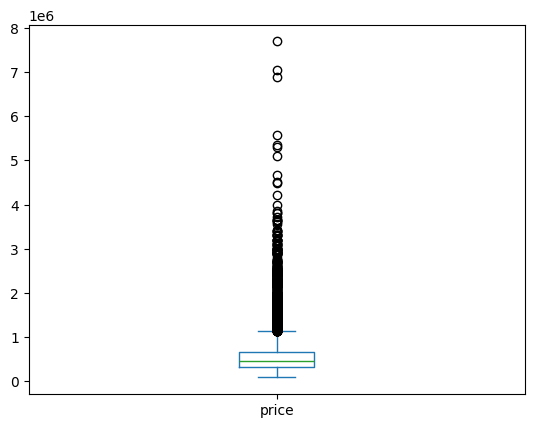

In [149]:
df.price.plot.box()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('MSE :', mse)
print('RMSE : ', rmse)
print('r2 : ', r2)


MSE : 300976498453.5009
RMSE :  548613.2503444488
r2 :  -354829143861.8533


c:\Users\natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1. remove outlier
2. normalisasi variable
3. filter variable